# Logistic Regression in Machine Learning:
Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class or not. It is a kind of statistical algorithm, which analyze the relationship between a set of independent variables and the dependent binary variables. It is a powerful tool for decision-making. For example email spam or not.

Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class. It is used for classification algorithms its name is logistic regression. it’s referred to as regression because it takes the output of the linear regression function as input and uses a sigmoid function to estimate the probability for the given class. The difference between linear regression and logistic regression is that linear regression output is the continuous value that can be anything while logistic regression predicts the probability that an instance belongs to a given class or not.

In [16]:
#data Pre-processing Step
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
#importing datasets
data_set=pd.read_csv('User_Data.csv')

In [17]:
data_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [18]:
#x-independent variable
x=data_set.iloc[:,[2,3]]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [19]:
x['Age']

0      19
1      35
2      26
3      27
4      19
       ..
395    46
396    51
397    50
398    36
399    49
Name: Age, Length: 400, dtype: int64

In [21]:
#extracting Independent and dependent variable
x=data_set.iloc[:,[2,3]].values
y=data_set.iloc[:,4].values

In [7]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [23]:
#spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [24]:
x_train['Age']#he

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [25]:
x_train

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],
       [    26,  15000],
       [    60, 102000],
       [    38, 112000],
       [    40, 107000],
       [    42,  53000],
       [    35,  59000],
       [    48,  41000],
       [    48, 134000],
       [    38, 113000],
       [    29, 148000],
       [    26,  15000],
       [    60,  42000],
       [    24,  19000],
       [    42, 149000],
       [    46,  96000],
       [    28,  59000],
       [    39,  96000],
       [    28,  89000],
       [    41,  72000],
       [    45,  26000],


In [31]:
#finding the mean and standared division of x_train
print(x_train[:,0].mean())
print(x_train[:,0].std())
#we can cross verify the x_train values after standaredscaler
#like
#44-38.126/10.097=0.58

38.126666666666665
10.097720314781725


In [42]:
#feature scaling
#it's changing train data into machine understanding same value
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.fit_transform(x_test) 

In [15]:
#finding the mean and standard diviation value
print(st_x.mean_)#mean value coming wrong here

[3.81266667e+01 6.95833333e+04]
[1.00977203e+01 3.44909127e+04]


In [44]:
x_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [45]:
x_test

array([[-0.54748976,  0.5130727 ],
       [ 0.15442019, -0.61825566],
       [-0.10879604,  0.14615539],
       [-0.54748976,  0.26846116],
       [-0.10879604, -0.61825566],
       [-0.81070599, -1.53554892],
       [-0.45975102, -1.68843113],
       [-0.0210573 ,  2.25592989],
       [-1.60035469, -0.0678797 ],
       [ 0.94406888, -0.83229075],
       [-0.54748976, -0.6488321 ],
       [-0.72296725, -0.46537345],
       [ 0.06668145, -0.46537345],
       [ 0.24215893,  0.20730828],
       [-1.4248772 ,  0.48249625],
       [-0.37201227,  1.43036596],
       [ 0.06668145,  0.20730828],
       [-1.51261594,  0.45191981],
       [ 1.64597884,  1.8278597 ],
       [-0.10879604, -1.47439603],
       [-0.10879604, -0.70998498],
       [ 0.94406888,  2.25592989],
       [ 0.41763642, -0.58767922],
       [ 0.94406888,  1.06344865],
       [-1.16166097, -1.29093738],
       [ 1.11954637,  2.16420057],
       [-0.72296725,  0.5130727 ],
       [-0.63522851,  0.2990376 ],
       [ 0.06668145,

In [46]:
#fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [47]:
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,l1_ratio=None,max_iter=100,multi_class='warn',n_jobs=None, penalty='l2',  
                   random_state=0, solver='warn', tol=0.0001, verbose=0,  
                   warm_start=False)

LogisticRegression(multi_class='warn', random_state=0, solver='warn')

In [48]:
classifier

LogisticRegression(random_state=0)

In [49]:
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [50]:
#predicting the test set result
y_pred=classifier.predict(x_test)

In [51]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [68]:
#displaying intercept and coefficient 
print(classifier.coef_)
print(classifier.intercept_)

[[2.07669377 1.1102991 ]]
[-0.9523224]


In [69]:
#cross check of predicted first values by algorithm formula
from IPython.display import Image
Image(url="20231205_203435.jpg",height=800,width=800)

In [52]:
#creating confusion matrix
'''
A confusion matrix is a table that is often used to describe the performance of a classification algorithm, such as logistic regression, on a set of test data for which the true values are known. 
The matrix summarizes the predictions of the model in terms of true positive, true negative, false positive, and false negative outcomes.
True Positive (TP): The model correctly predicted a positive outcome (class 1).
True Negative (TN): The model correctly predicted a negative outcome (class 0).
False Positive (FP): The model incorrectly predicted a positive outcome (class 1), also known as a Type I error.
False Negative (FN): The model incorrectly predicted a negative outcome (class 0), also known as a Type II error.
           predicted    predicted  
           no            yes
Actual no    TN          FP
Actual yes   FN          TP

'''
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [57]:
cm

array([[63,  5],
       [ 8, 24]], dtype=int64)

In [62]:
#find the accuracy:Overall,how often is the classifier correct?
#accuracy=TN+TP/TN+FP+FN+TP
total=63+5+8+24
accuracy=(63+24)/total
print("Accuracy:",accuracy*100)


Accuracy: 87.0


In [63]:
#find the missclassification rate:Overall,how often is it wrong?
#missclassification rate=FN+FP/TN+FP+FN+TP
missclass=(5+8)/total
print("Missclassification rate:",missclass*100)

Missclassification rate: 13.0


In [66]:
#find the true positive rate
#true positive rate:when it's actually yes,how often does it predict yes?
#also known as "Sensitivity" or "Recall"
#true Positive rate=TP/Actualyes(total yes)
truepos=24/32
print("predicted True Positive Rate:",truepos*100)

predicted True Positive Rate: 75.0


In [70]:
#find true negative rate
#when it's actually no,does it predict no
#also known as "Specificity"
#true Negative rate=TN/Actualno(total no)
negpos=24/68
print("predicted true Negative Rate:",negpos*100)

predicted True Positive Rate: 35.294117647058826


In [71]:
#find the precision
#whaen it predicts yes,how often is it correct?
#precision=TP/Predicted yes
precision=24/29
print("precision:",precision*100)

precision: 82.75862068965517


C:\Users\Admin\AppData\Local\Temp\ipykernel_1748\1907629130.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],c = ListedColormap(('black', 'white'))(i), label = j)


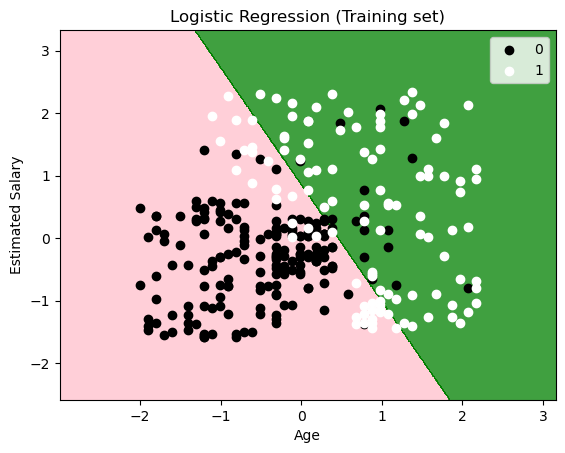

In [54]:
#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha = 0.75, cmap = ListedColormap(('pink','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],c = ListedColormap(('black', 'white'))(i), label = j)  
mtp.title('Logistic Regression (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

C:\Users\Admin\AppData\Local\Temp\ipykernel_1748\951514146.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],c = ListedColormap(('purple', 'green'))(i), label = j)


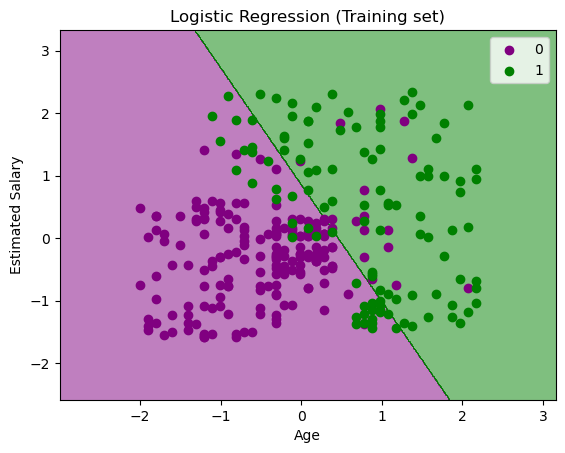

In [55]:
#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha = 0.50, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Logistic Regression (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

C:\Users\Admin\AppData\Local\Temp\ipykernel_1748\2770522377.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


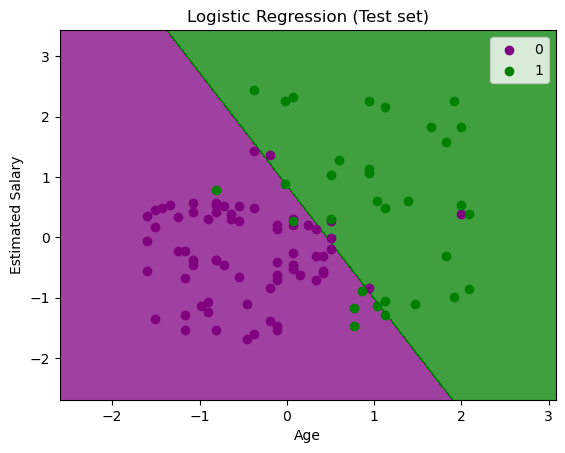

In [56]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Logistic Regression (Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show() 